In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.metrics import r2_score

from prophet import Prophet

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

In [3]:
warnings.filterwarnings("ignore")

# Data Preparation

In [4]:
weather_df = pd.read_csv('NASA_weather_latitude_51.5_longitude_37.0.csv', skiprows=8)
weather_df["DATE"] = pd.to_datetime(weather_df["DAY"], format='%Y%m%d')
# weather_df.set_index('DAY', inplace=True)

In [5]:
weather_df.head()

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH,DATE
0,19840101,2500.0,-5.20,0.26,0.479845,7.59,2.93,NaN,1984-01-01
1,19840102,3250.0,0.30,1.26,0.610800,7.50,2.77,NaN,1984-01-02
2,19840103,4240.0,-1.74,0.99,0.534874,7.11,0.72,NaN,1984-01-03
3,19840104,2740.0,-1.13,0.66,0.592380,5.12,0.44,NaN,1984-01-04
4,19840105,1890.0,-3.70,0.99,0.569003,3.09,0.88,NaN,1984-01-05


**train-test split**

In [6]:
train_tmp = weather_df[weather_df.DATE.dt.year > 1999].copy()
train_data = train_tmp[train_tmp.DATE.dt.year < 2015].copy()

In [7]:
test_tmp = weather_df[weather_df.DATE.dt.year > 2014].copy()
test_data = test_tmp[test_tmp.DATE.dt.year < 2020].copy()

In [8]:
def plotter(train, test, col):
    plt.title(f"{col} train-test plot")
    train[f'{col}'].plot(style='b')
    test[f'{col}'].plot(style='r')
    plt.legend(['train', 'test'], loc=1, prop={'size': 20})
    plt.grid()

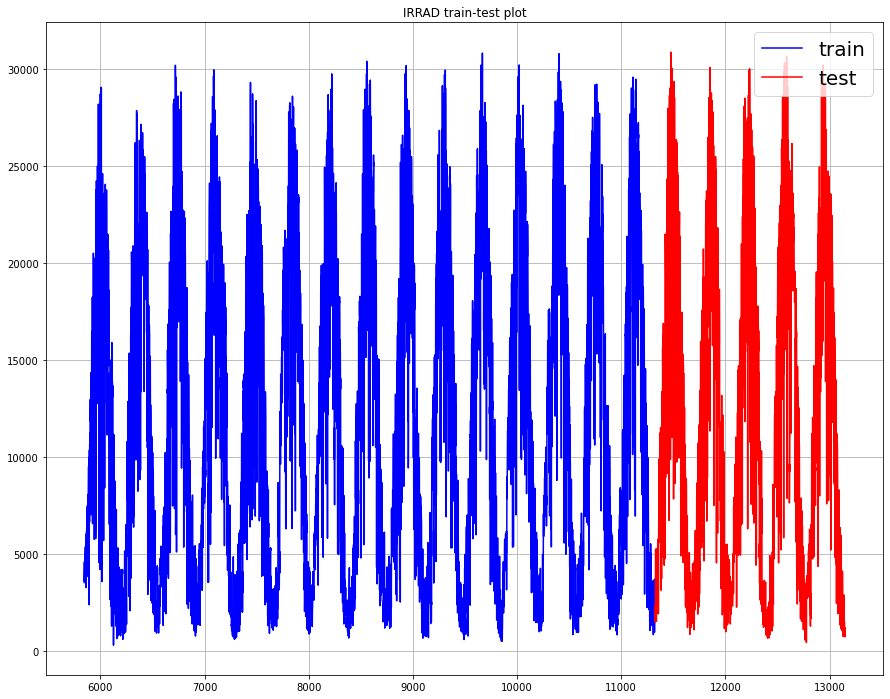

In [9]:
plotter(train_data, test_data, 'IRRAD')

# PROPHET

## IRRAD

In [10]:
irrad_train = train_data[['DATE', 'IRRAD']].copy()
irrad_train.rename(columns={"DATE": "ds", "IRRAD": "y"}, inplace=True)

In [11]:
irrad_model = Prophet('flat')
irrad_model.fit(irrad_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -198.376


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      10       8462.04   0.000622483      0.807601       0.998       0.998       15   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [12]:
future = irrad_model.make_future_dataframe(periods=test_data.shape[0])
irrad_forecast = irrad_model.predict(future)

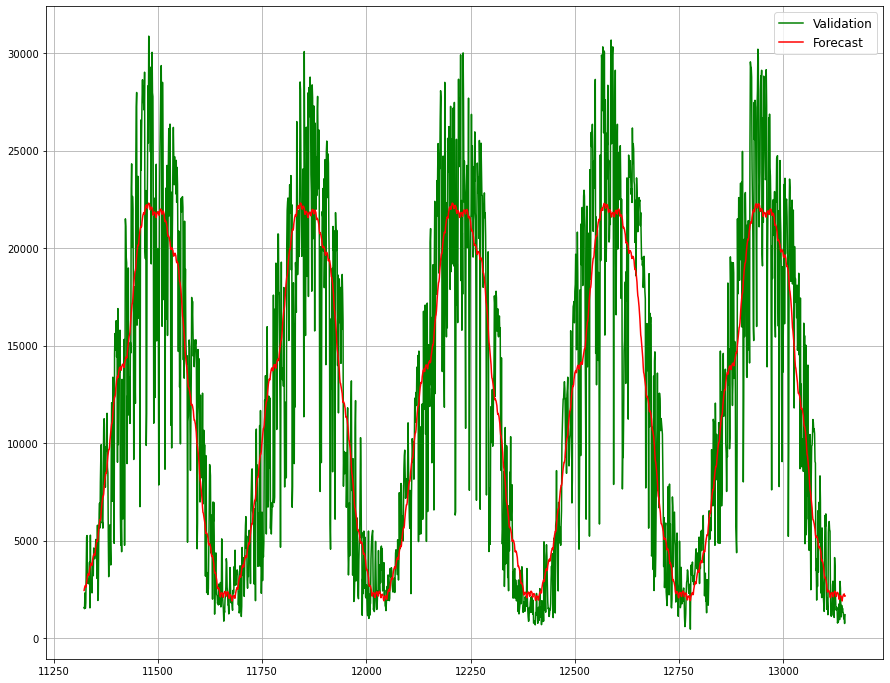

In [13]:
test_data['IRRAD_hat'] = irrad_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.IRRAD.plot(style=['g']);
test_data.IRRAD_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [14]:
print(f'R2 Score:\t{r2_score(test_data.IRRAD, test_data.IRRAD_hat)}')

R2 Score:	0.7695037164222761


## TMIN

In [15]:
tmin_train = train_data[['DATE', 'TMIN']].copy()
tmin_train.rename(columns={"DATE": "ds", "TMIN": "y"}, inplace=True)

In [16]:
tmin_model = Prophet()
tmin_model.fit(tmin_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -937.018


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8430.26   0.000180293       71.4699      0.5366      0.5366      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       8430.39   0.000560537       214.252   5.257e-06       0.001      181  LS failed, Hessian reset 
     199       8431.04   1.84309e-05       79.3111       0.646      0.0646      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       8431.17   0.000413473       83.6238   6.123e-06       0.001      396  LS failed, Hessian reset 
     299       8431.26   0.000114866       79.4886           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8431.37     0.0122212       138.012           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha

In [17]:
tmin_forecast = tmin_model.predict(future)

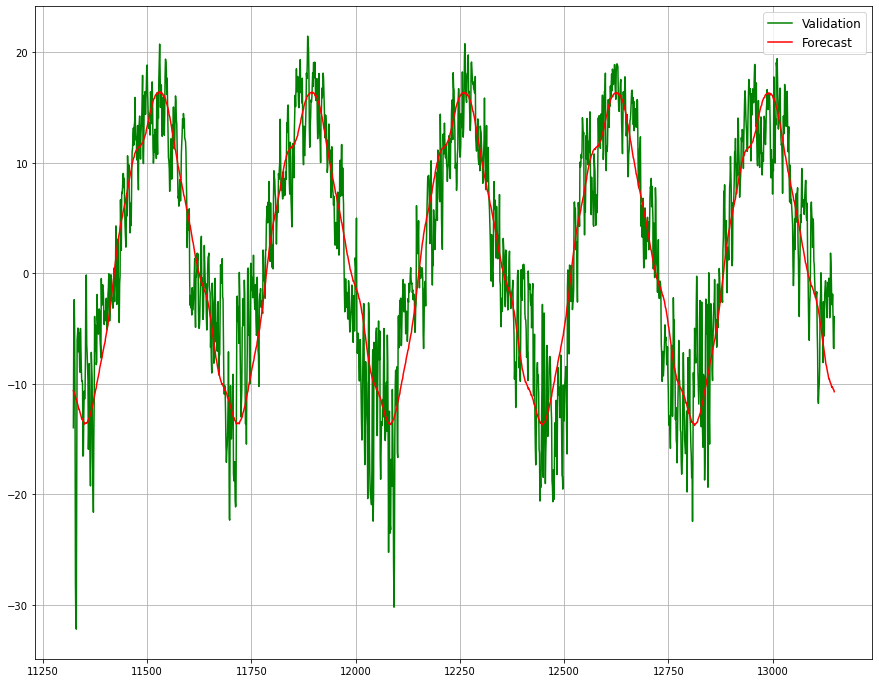

In [18]:
test_data['TMIN_hat'] = tmin_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.TMIN.plot(style=['g']);
test_data.TMIN_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [19]:
print(f'R2 Score:\t{r2_score(test_data.TMIN, test_data.TMIN_hat)}')

R2 Score:	0.812617490716735


## TMAX

In [20]:
tmax_train = train_data[['DATE', 'TMAX']].copy()
tmax_train.rename(columns={"DATE": "ds", "TMAX": "y"}, inplace=True)

In [21]:
tmax_model = Prophet('flat')
tmax_model.fit(tmax_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -282.847


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       9       9143.15   5.49946e-05      0.564243           1           1       15   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [22]:
tmax_forecast = tmax_model.predict(future)

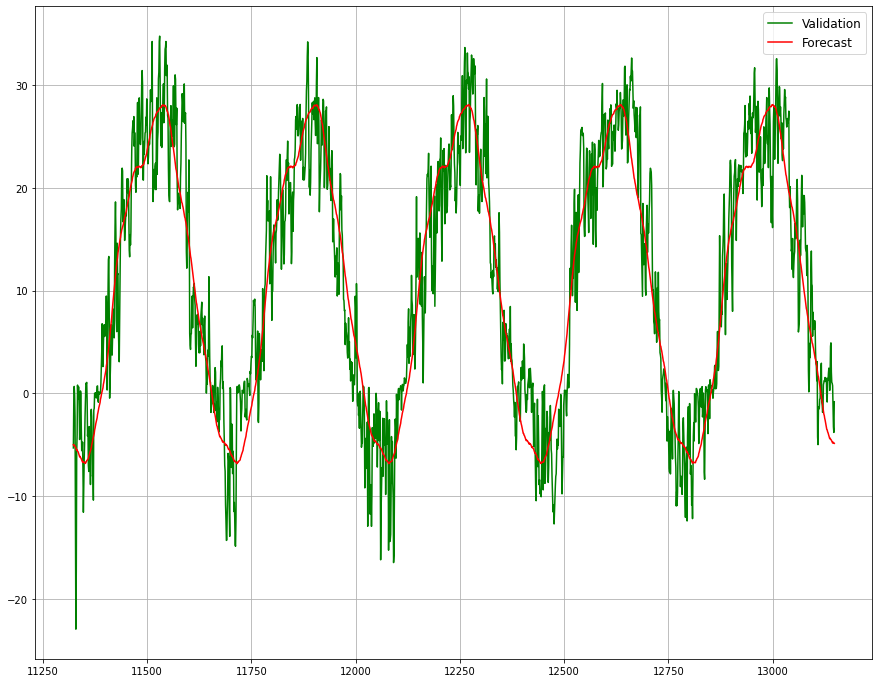

In [23]:
test_data['TMAX_hat'] = tmax_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.TMAX.plot(style=['g']);
test_data.TMAX_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [24]:
print(f'R2 Score:\t{r2_score(test_data.TMAX, test_data.TMAX_hat)}')

R2 Score:	0.873674717889552


## VAP

In [25]:
vap_train = train_data[['DATE', 'VAP']].copy()
vap_train.rename(columns={"DATE": "ds", "VAP": "y"}, inplace=True)

In [26]:
vap_model = Prophet('flat')
vap_model.fit(vap_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -121.908


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      14       10248.7   3.56389e-05      0.994539      0.6483      0.6483       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [27]:
vap_forecast = vap_model.predict(future)

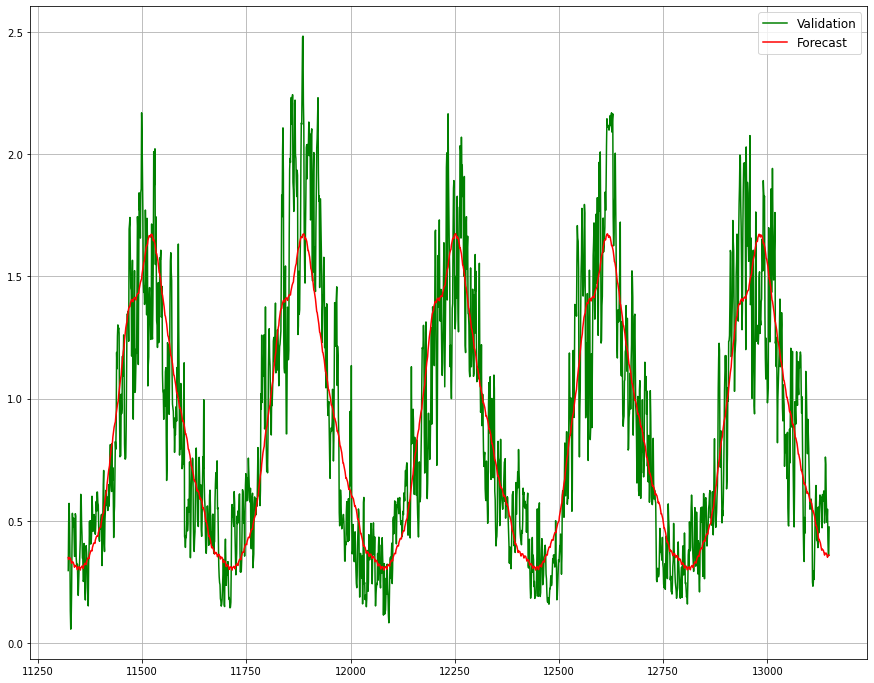

In [28]:
test_data['VAP_hat'] = vap_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.VAP.plot(style=['g']);
test_data.VAP_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [29]:
print(f'R2 Score:\t{r2_score(test_data.VAP, test_data.VAP_hat)}')

R2 Score:	0.7830764441398711


## WIND

In [30]:
wind_train = train_data[['DATE', 'WIND']].copy()
wind_train.rename(columns={"DATE": "ds", "WIND": "y"}, inplace=True)

In [31]:
wind_model = Prophet('flat')
wind_model.fit(wind_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -47.2145


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7       9025.51   8.22616e-05      0.544798           1           1       15   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [32]:
wind_forecast = wind_model.predict(future)

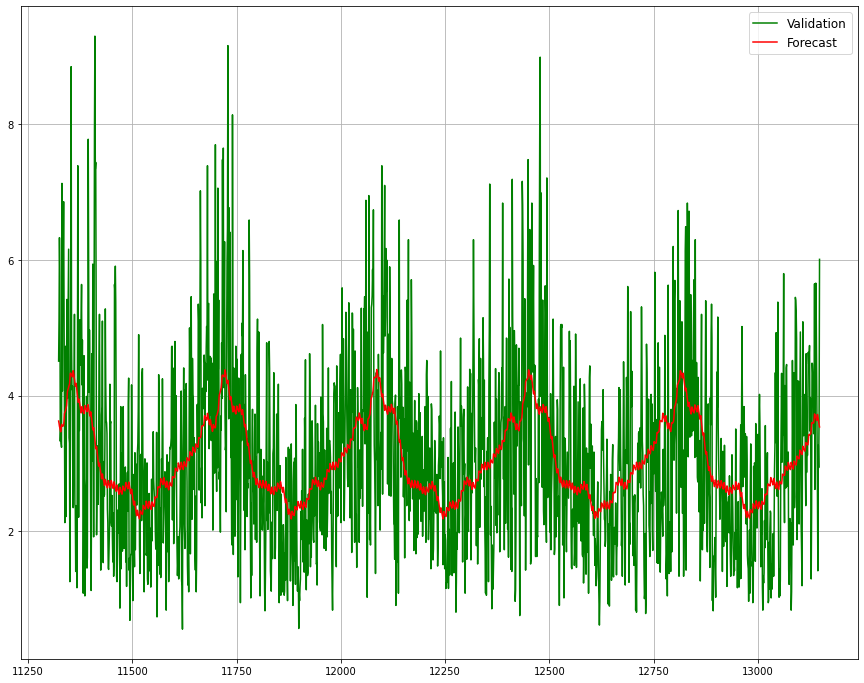

In [33]:
test_data['WIND_hat'] = wind_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.WIND.plot(style=['g']);
test_data.WIND_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [34]:
print(f'R2 Score:\t{r2_score(test_data.WIND, test_data.WIND_hat)}')

R2 Score:	0.16714230380645712


## RAIN

In [35]:
rain_train = train_data[['DATE', 'RAIN']].copy()
rain_train.rename(columns={"DATE": "ds", "RAIN": "y"}, inplace=True)

In [36]:
rain_model = Prophet('flat')
rain_model.fit(rain_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.2239


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7       10031.1   1.60721e-05      0.718485      0.3975      0.9719       13   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [37]:
rain_forecast = rain_model.predict(future)

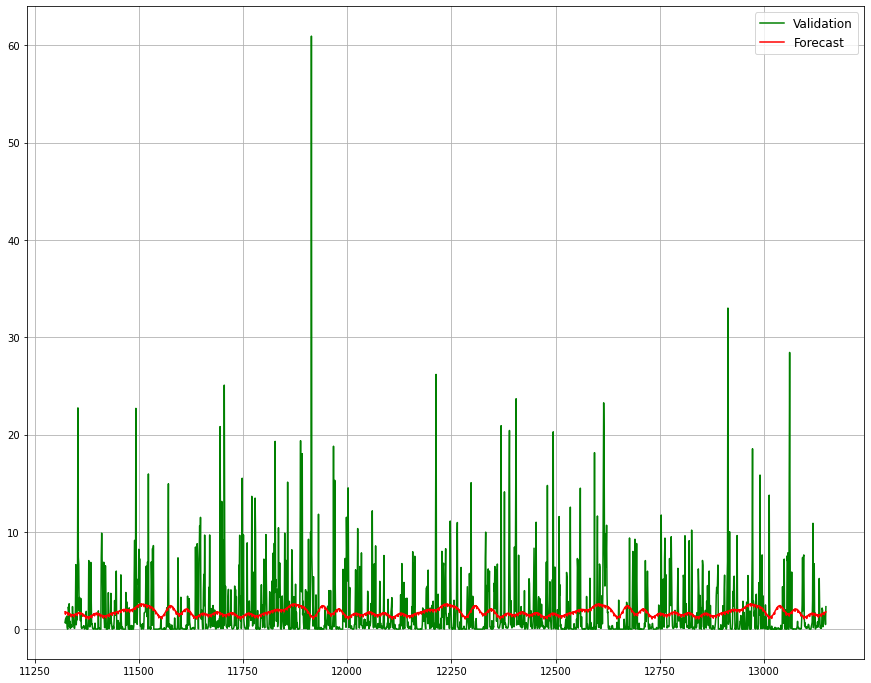

In [38]:
test_data['RAIN_hat'] = rain_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.RAIN.plot(style=['g']);
test_data.RAIN_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [39]:
print(f'R2 Score:\t{r2_score(test_data.RAIN, test_data.RAIN_hat)}')

R2 Score:	-0.007759663158291685


# AVARAGE

In [40]:
avarage = train_data.groupby(by=[train_data.DATE.dt.month, train_data.DATE.dt.day]).mean()

IRRAD_year = avarage[avarage.index != (2, 29)].IRRAD.to_numpy()
IRRAD_leap_year = avarage.IRRAD.to_numpy()

TMIN_year = avarage[avarage.index != (2, 29)].TMIN.to_numpy()
TMIN_leap_year = avarage.TMIN.to_numpy()

TMAX_year = avarage[avarage.index != (2, 29)].TMAX.to_numpy()
TMAX_leap_year = avarage.TMAX.to_numpy()

VAP_year = avarage[avarage.index != (2, 29)].VAP.to_numpy()
VAP_leap_year = avarage.VAP.to_numpy()

WIND_year = avarage[avarage.index != (2, 29)].WIND.to_numpy()
WIND_leap_year = avarage.WIND.to_numpy()

RAIN_year = avarage[avarage.index != (2, 29)].RAIN.to_numpy()
RAIN_leap_year = avarage.RAIN.to_numpy()

In [41]:
test_data['IRRAD_avg'] = np.concatenate((IRRAD_year, IRRAD_leap_year, IRRAD_year, IRRAD_year, IRRAD_year), axis=0)
test_data['TMIN_avg'] = np.concatenate((TMIN_year, TMIN_leap_year, TMIN_year, TMIN_year, TMIN_year), axis=0)
test_data['TMAX_avg'] = np.concatenate((TMAX_year, TMAX_leap_year, TMAX_year, TMAX_year, TMAX_year), axis=0)
test_data['VAP_avg'] = np.concatenate((VAP_year, VAP_leap_year, VAP_year, VAP_year, VAP_year), axis=0)
test_data['WIND_avg'] = np.concatenate((WIND_year, WIND_leap_year, WIND_year, WIND_year, WIND_year), axis=0)
test_data['RAIN_avg'] = np.concatenate((RAIN_year, RAIN_leap_year, RAIN_year, RAIN_year, RAIN_year), axis=0)

# COMPARE

In [42]:
print("\033[1m" + "Prophet" + "\033[1m")
print(f'R2 Score IRRAD:\t{r2_score(test_data.IRRAD, test_data.IRRAD_hat)}')
print(f'R2 Score TMIN:\t{r2_score(test_data.TMIN, test_data.TMIN_hat)}')
print(f'R2 Score TMAX:\t{r2_score(test_data.TMAX, test_data.TMAX_hat)}')
print(f'R2 Score VAP:\t{r2_score(test_data.VAP, test_data.VAP_hat)}')
print(f'R2 Score WIND:\t{r2_score(test_data.WIND, test_data.WIND_hat)}')
print(f'R2 Score RAIN:\t{r2_score(test_data.RAIN, test_data.RAIN_hat)}')

Prophet
R2 Score IRRAD:	0.7695037164222761
R2 Score TMIN:	0.812617490716735
R2 Score TMAX:	0.873674717889552
R2 Score VAP:	0.7830764441398711
R2 Score WIND:	0.16714230380645712
R2 Score RAIN:	-0.007759663158291685


In [43]:
print("\033[1m" + "Avarage" + "\033[1m")
print(f'R2 Score IRRAD:\t{r2_score(test_data.IRRAD, test_data.IRRAD_avg)}')
print(f'R2 Score TMIN:\t{r2_score(test_data.TMIN, test_data.TMIN_avg)}')
print(f'R2 Score TMAX:\t{r2_score(test_data.TMAX, test_data.TMAX_avg)}')
print(f'R2 Score VAP:\t{r2_score(test_data.VAP, test_data.VAP_avg)}')
print(f'R2 Score WIND:\t{r2_score(test_data.WIND, test_data.WIND_avg)}')
print(f'R2 Score RAIN:\t{r2_score(test_data.RAIN, test_data.RAIN_avg)}')

Avarage
R2 Score IRRAD:	0.7609142326849094
R2 Score TMIN:	0.8061203739969385
R2 Score TMAX:	0.8712290229405724
R2 Score VAP:	0.7784953518632737
R2 Score WIND:	0.0985660352955875
R2 Score RAIN:	-0.05690642353976405


In [44]:
test_data.head()

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH,DATE,IRRAD_hat,...,TMAX_hat,VAP_hat,WIND_hat,RAIN_hat,IRRAD_avg,TMIN_avg,TMAX_avg,VAP_avg,WIND_avg,RAIN_avg
11323,20150101,1570.0,-13.97,-5.31,0.296775,4.51,0.68,NaN,2015-01-01,2444.759620,...,-4.995574,0.349984,3.627238,1.783456,2659.333333,-10.528000,-5.593333,0.338065,3.100000,0.913333
11324,20150102,1510.0,-5.18,-0.77,0.492191,5.11,0.96,NaN,2015-01-02,2575.333387,...,-5.091093,0.342068,3.593381,1.533375,2694.000000,-10.911333,-5.608000,0.334922,3.724667,2.240667
11325,20150103,2320.0,-2.38,0.68,0.571513,6.33,1.14,NaN,2015-01-03,2625.551691,...,-5.019448,0.349538,3.550257,1.762349,2864.666667,-12.404000,-5.602000,0.317909,3.388000,1.838667
11326,20150104,1530.0,-4.93,-0.16,0.506322,5.75,0.59,NaN,2015-01-04,2699.011608,...,-5.111563,0.348583,3.520703,1.730274,2709.333333,-12.902667,-6.960667,0.315938,2.994667,1.356667
11327,20150105,1800.0,-11.96,-2.27,0.369812,3.33,1.33,NaN,2015-01-05,2611.028562,...,-5.121399,0.348555,3.496088,1.713361,2960.666667,-14.481333,-7.332667,0.300257,2.942667,1.124000


In [49]:
weather = test_data[['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN', 'SNOWDEPTH']].copy()
weather.to_csv('weather2015-2020.csv',index=False)

In [50]:
weather_part_forecast = test_data[['DAY', 'IRRAD_hat', 'TMIN_hat', 'TMAX_hat', 'VAP_hat', 'WIND', 'RAIN', 'SNOWDEPTH']].copy()
weather_part_forecast.rename(columns={
    "IRRAD_hat": "IRRAD", 
    "TMIN_hat": "TMIN", 
    "TMAX_hat": "TMAX", 
    "VAP_hat": "VAP",
}, inplace=True)
weather_part_forecast.to_csv('weather_partforecast_2015-2020.csv',index=False)

In [51]:
weather_forecast = test_data[['DAY', 'IRRAD_hat', 'TMIN_hat', 'TMAX_hat', 'VAP_hat', 'WIND_hat', 'RAIN_hat', 'SNOWDEPTH']].copy()
weather_forecast.rename(columns={
    "IRRAD_hat": "IRRAD", 
    "TMIN_hat": "TMIN", 
    "TMAX_hat": "TMAX", 
    "VAP_hat": "VAP",
    "WIND_hat": "WIND",
    "RAIN_hat": "RAIN"
}, inplace=True)
weather_forecast.to_csv('weather_forecast_2015-2020.csv',index=False)